# Linear Discriminant Analysis (LDA)
- In this notebook, we will build a classification model using Linear Discriminant Analysis (LDA) to classify customers based on their likelihood of owning a riding lawn mower.


- We will use the scikit-learn package for training, evaluating, and making predictions with the classification model. You can refer to the documentation for the Linear Discriminant Analysis (LDA) function in the following link:
    - https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

## 1. LDA on “Riding Mowers” dataset

### (1) Prepare an example data
- The dataset contains customer information such as Income and Lot Size to predict whether the customer owns a riding lawn mower (Ownership).

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pylab as plt


In [2]:
url = "https://raw.githubusercontent.com/reisanar/datasets/master/RidingMowers.csv"
mower_df = pd.read_csv(url)

In [3]:
mower_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


### (2) Define and Train a Linear Discriminant Analysis model
- This step trains the LDA model using Income and Lot Size as input features, and Ownership as the target variable.

In [4]:
clf = LinearDiscriminantAnalysis()
clf.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print('Coefficients', clf.coef_)
print('Intercept', clf.intercept_)

c_income = clf.coef_[0, 0]
c_lotSize = clf.coef_[0, 1]
intercept = clf.intercept_[0]

print('Decision function')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income, c_lotSize, intercept))

print('\nExample Income=$60K Lot_Size=18.4Kft2')
print('  {:.2f}*60 + {:.2f}*18.4 + {:.2f} = {:.2f}'.format(c_income, c_lotSize, intercept,
                                                          clf.decision_function([[60, 18.4]])[0]))
print('  negative => nonowner')

Coefficients [[0.1002303  0.78518471]]
Intercept [-21.73876167]
Decision function
 = 0.10*Income + 0.79*Lot_Size + -21.74

Example Income=$60K Lot_Size=18.4Kft2
  0.10*60 + 0.79*18.4 + -21.74 = -1.28
  negative => nonowner


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


### (3) Visualize the decision boundary
- This step visualizes the owners and non-owners on a scatter plot, and adds the LDA decision boundary.

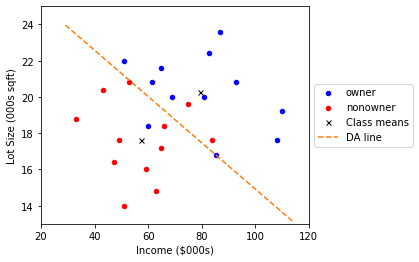

In [5]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(clf.means_[:,0], clf.means_[:,1], 'x', color='black', label='Class means', markersize=5)
x_lda = np.array(ax.get_xlim())
y_lda = (- intercept - c_income * x_lda) / c_lotSize
ax.plot(x_lda, y_lda, '--', color='C1', label='DA line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### (5) Test and Evaluate the model

In [6]:
clf = LinearDiscriminantAnalysis()
clf.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

result_df = mower_df.copy()
result_df.index = result_df.index + 1
result_df['Dec. Function'] = clf.decision_function(mower_df.drop(columns=['Ownership']))
result_df['Prediction'] = clf.predict(mower_df.drop(columns=['Ownership']))
result_df['p(Owner)'] = clf.predict_proba(mower_df.drop(columns=['Ownership']))[:, 1]

print(result_df)

    Income  Lot_Size Ownership  Dec. Function Prediction  p(Owner)
1     60.0      18.4     Owner      -1.277545   Nonowner  0.217968
2     85.5      16.8     Owner       0.022032      Owner  0.505508
3     64.8      21.6     Owner       1.716152      Owner  0.847632
4     61.5      20.8     Owner       0.757244      Owner  0.680755
5     87.0      23.6     Owner       5.511634      Owner  0.995977
6    110.1      19.2     Owner       4.372141      Owner  0.987533
7    108.0      17.6     Owner       2.905362      Owner  0.948111
8     82.8      22.4     Owner       4.148445      Owner  0.984456
9     69.0      20.0     Owner       0.880823      Owner  0.706993
10    93.0      20.8     Owner       3.914499      Owner  0.980440
11    51.0      22.0     Owner       0.647047      Owner  0.656345
12    81.0      20.0     Owner       2.083587      Owner  0.889298
13    75.0      19.6  Nonowner       1.168131      Owner  0.762807
14    52.8      20.8  Nonowner      -0.114760   Nonowner  0.47

- Here, we calculate the decision function and predictions for each customer in the dataset, as well as the probability of being an owner.

- Summary:
    - We built and trained a Linear Discriminant Analysis (LDA) model on the Riding Mowers dataset.
    - We computed the decision function, visualized the decision boundary, and evaluated the model’s performance on the dataset.